# Aragon Conviction Voting Model - Version 2

New to this model are the following elements:

* Influence - Participant social network where participants influence each others perception of a a proposal.
* Conflict - A network with the notion of supporting one proposal may mean going against an alternative proposal. For proposals with conflicts, an edge is created between them with a function to calculate the degree of conflict.
* Sentiment - Participant sentiment
* Updated trigger function to better represent 1Hive's implementation
* Updated plotting
* Updated affinity distribution to between -1, 1
* Refined parameters to better reflect 1Hive's implementation


# An Introduction to Conviction Voting

Conviction Voting is an approach to organizing a communities preferences into discrete decisions in the management of that communities resources. Strictly speaking conviction voting is less like voting and more like signal processing. Framing the approach and the initial algorithm design was done by Michael Zargham and published in a short research proposal [Social Sensor Fusion](https://github.com/BlockScience/conviction/blob/master/social-sensorfusion.pdf). This work is based on a dynamic resource allocation algorithm presented in Zargham's PhD Thesis.

The work proceeded in collaboration with the Commons Stack, including expanding on the pythin implementation to makeup part of the Commons Simulator game. An implemention of Conviction Voting as a smart contract within the Aragon Framework was developed by 1hive.org and is currently being used for community decision making around allocations their community currency, Honey.


## The Word Problem

Suppose a group of people want to coordinate to make a collective decision. Social dynamics such as discussions, signaling, and even changing ones mind based on feedback from others input play an important role in these processes. While the actual decision making process involves a lot of informal processes, in order to be fair the ultimate decision making process still requires a set of formal rules that the community collecively agrees to, which serves to functionally channel a plurality of preferences into a discrete outcomes. In our case we are interested in a procedure which supports asynchronous interactions, an provides visibility into likely outcomes prior to their resolution to serve as a driver of good faith, debate and healthy forms of coalition building. Furthermore, participations should be able to show support for multiple initiatives, and to vary the level of support shown. Participants a quantity of signaling power which may be fixed or variable, homogenous or heterogenous. For the purpose of this document, we'll focus on the case where the discrete decisions to be made are decisions to allocate funds from a shared funding pool towards projects of interest to the community.

## Converting to a Math Problem

Let's start taking these words and constructing a mathematical representation that supports a design that meets the description above. To start we need to define participants.

### Participants
Let $\mathcal{A}$ be the set of participants. Consider a participant $a\in \mathcal{A}$. Any participant $a$ has some capacity to participate in the voting process $h[a]$. In a fixed quantity, homogenous system $h[a] = h$ for all $a\in \mathcal{A}$ where $h$ is a constant. The access control process managing how one becomes a participant determines the total supply of "votes" $S = \sum_{a\in \mathcal{A}} = n\cdot h$ where the number of participants is $n = |\mathcal{A}|$. In a smart contract setting, the set $\mathcal{A}$ is a set of addresses, and $h[a]$ is a quantity of tokens held by each address $a\in \mathcal{A}$. 

### Proposals & Shares Resources
Next, we introduce the idea of proposals.  Consider a proposal $i\in \mathcal{C}$. Any proposal $i$ is associated with a request for resources $r[i]$. Those requested resources would be allocated from a constrained pool of communal resources currently totaling $R$. The pool of resources may become depleted because when a proposal $i$ passes $R^+= R-r[i]$. Therefore it makes sense for us to consider what fraction of the shared resources are being request $\mu_i = \frac{r[i]}{R}$, which means that thre resource depletion from passing proposals can be bounded by requiring $\mu_i < \mu$ where $\mu$ is a constant representing the maximum fraction of the shared resources which can be dispersed by any one proposal. In order for the system to be sustainable a source of new resources is required. In the case where $R$ is funding, new funding can come from revenues, donations, or in some DAO use cases minting tokens.

### Participants Preferences for Proposals

Most of the interesting information in this system is distributed amongst the participants and it manifests as preferences over the proposals. This can be thought of as a matrix $W\in \mathbb{R}^{n \times m}$.
![Replace this later](https://i.imgur.com/vxKNtxi.png)

These private hidden signals drive discussions and voting actions. Each participant individually decides how to allocate their votes across the available proposals. Participant $a$ supports proposal $i$ by setting $x[a,i]>0$ but they are limited by their capacity $\sum_{k\in \mathcal{C}} x[a,k] \le h[a]$.  Assuming each participant chooses a subset of the proposals to support, a support graph is formed.
![](https://i.imgur.com/KRh8tKn.png)

## Aggregating Information

In order to break out of the synchronous voting model, a dynamical systems model of this system is introduced.

### Participants Allocate Voting Power
![](https://i.imgur.com/DZRDwk6.png)

### System Accounts Proposal Conviction
![](https://i.imgur.com/euAei5R.png)

### Understanding Alpha
* https://www.desmos.com/calculator/x9uc6w72lm
* https://www.desmos.com/calculator/0lmtia9jql


## Converting Signals to Discrete Decisions

Conviction as kinetic energy and Trigger function as required activation energy.

### The Trigger Function

https://www.desmos.com/calculator/yxklrjs5m3

Below we show a sweep of the trigger function threshold:

In [1]:
from model.model.conviction_helper_functions import *
import warnings
warnings.filterwarnings("ignore")

beta = .2 #later we should set this to be param so we can sweep it
# tuning param for the trigger function
rho = .001
alpha = .5**3 #timescale set in days with 3 day halflife (from comments in contract comments)
supply= 21706 

mcv = supply/(1-alpha)
print('for reference: max conviction = '+str(np.log10(mcv))+'in log10 units')

for reference: max conviction = 4.394571745651725in log10 units


/home/aclarkdata/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
supply_sweep = trigger_sweep('effective_supply',trigger_threshold, supply)
alpha_sweep = trigger_sweep('alpha',trigger_threshold, supply)

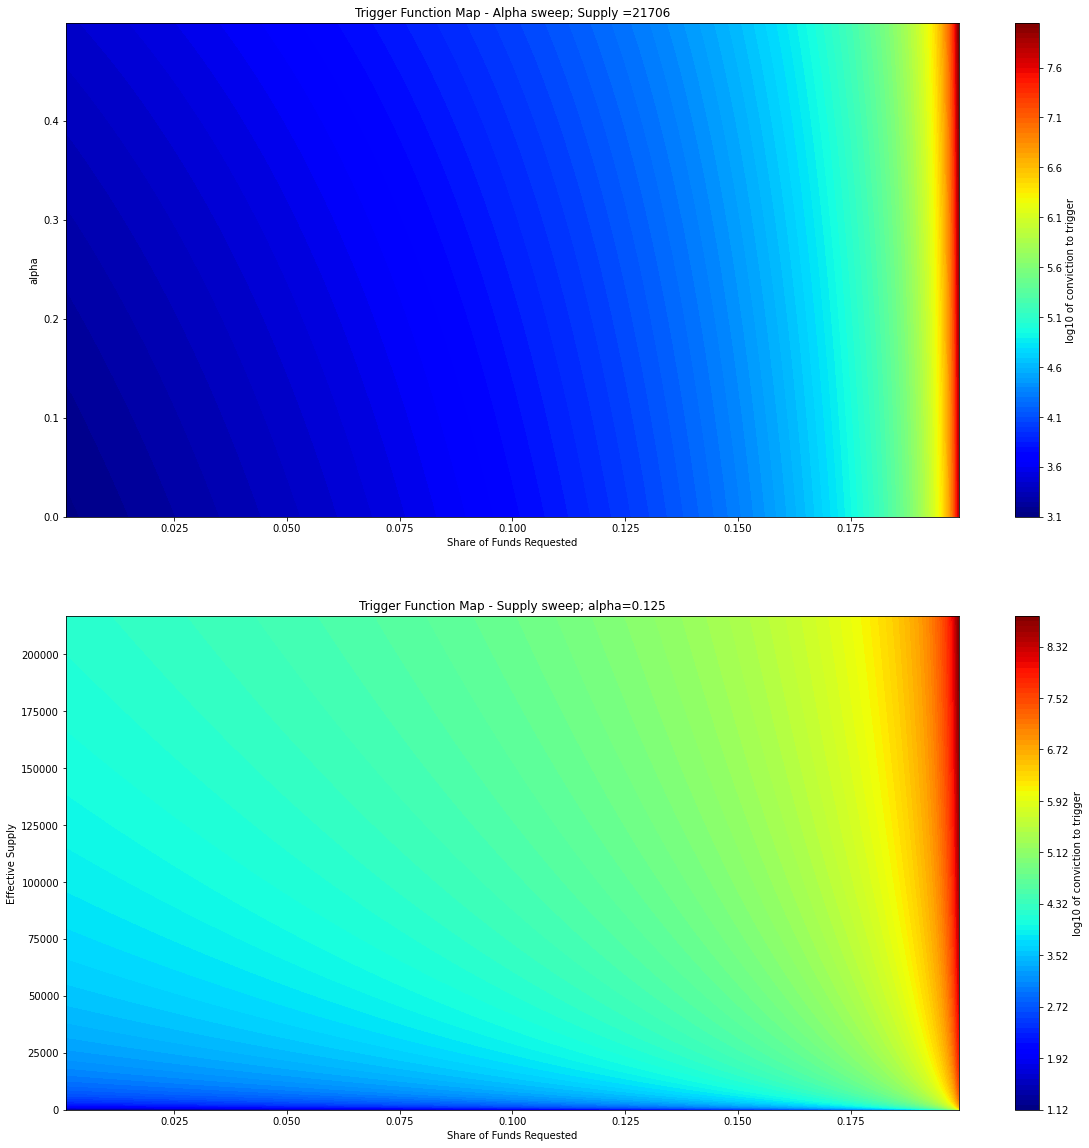

In [3]:
trigger_grid(supply_sweep, alpha_sweep)


### Resolving Passed Proposals

![](images/stockflow_cv_trigger.png)


## Social Systems Modeling

Subjective, exploratory modeling of the social system interacting through the conviction voting algorithm.

### Sentiment

Global Sentiment -- the outside world appreciating the output of the community
Local Sentiment -- agents within the system feeling good about the community

### Social Networks

Preferences as mixing process (social influence)

### Relationships between Proposals

Some proposals are synergistic (passing one makes the other more desireable)
Some proposals are (parially) substitutable (passing one makes the other less desirable)


## cadCAD Overview

In the cadCAD simulation [methodology](https://community.cadcad.org/t/differential-specification-syntax-key/31), we operate on four layers: **Policies, Mechanisms, States**, and **Metrics**. Information flows do not have explicit feedback loop unless noted. **Policies** determine the inputs into the system dynamics, and can come from user input, observations from the exogenous environment, or algorithms. **Mechanisms** are functions that take the policy decisions and update the States to reflect the policy level changes. **States** are variables that represent the system quantities at the given point in time, and **Metrics** are computed from state variables to assess the health of the system. Metrics can often be thought of as KPIs, or Key Performance Indicators. 

At a more granular level, to setup a model, there are system conventions and configurations that must be [followed.](https://community.cadcad.org/t/introduction-to-simulation-configurations/34)

The way to think of cadCAD modeling is analogous to machine learning pipelines which normally consist of multiple steps when training and running a deployed model. There is preprocessing, which includes segregating features between continuous and categorical, transforming or imputing data, and then instantiating, training, and running a machine learning model with specified hyperparameters. cadCAD modeling can be thought of in the same way as states, roughly translating into features, are fed into pipelines that have built-in logic to direct traffic between different mechanisms, such as scaling and imputation. Accuracy scores, ROC, etc. are analogous to the metrics that can be configured on a cadCAD model, specifying how well a given model is doing in meeting its objectives. The parameter sweeping capability of cadCAD can be thought of as a grid search, or way to find the optimal hyperparameters for a system by running through alternative scenarios. A/B style testing that cadCAD enables is used in the same way machine learning models are A/B tested, except out of the box, in providing a side by side comparison of muliple different models to compare and contrast performance. Utilizing the field of Systems Identification, dynamical systems models can be used to "online learn" by providing a feedback loop to generative system mechanisms. 


## Differential Specification 
![](images/Aragon_v2.png)

## Schema of the states 
The model consists of a temporal in memory graph database called *network* containing nodes of type **Participant** and type **Proposal**. Participants will have *holdings* and *sentiment* and Proposals will have *funds_required, status*(candidate or active), *conviction* Tthe model as three kinds of edges:
* (Participant, participant), we labeled this edge type "influencer" and it contains information about how the preferences and sentiment of one participant influence another 
* (Proposal, Proposal), we labeled this edge type "conflict" and it contains information about how synergistic or anti-synergistic two proposals are; basically people are likely to support multiple things that have synergy (meaning once one is passed there is more utility from the other) but they are not likely to pass things that have antisynergy (meaning once one is passed there is less utility from the other).
* The edges between Participant and Proposal, which are described below.
    

Edges in the network go from nodes of type Participant to nodes of type Proposal with the edges having the key *type*, of which all will be set to *support*. Edges from participant $i$ to proposal $j$ will have the following additional characteristics:
* Each pairing (i,j) will have *affinity*, which determines how much $i$ likes or dislikes proposal $j$.
* Each participant $i$, assigns its $tokens$ over the edges (i,j) for all $j$ such that the summation of all $j$ such that ```Sum_j = network.edges[(i,j)]['tokens'] = network.nodes[i]['holdings']```. This value of tokens for participants on proposals must be less than or equal to the total number of tokens held by the participant.
* Each pairing (i,j) will have *conviction* local to that edge whose update at each timestep is computed using the value of *tokens* at that edge.
* Each proposal *j* will have a *conviction* which is equal to the sum of the conviction on its inbound edges: ```network.nodes[j]['conviction'] = Sum_i  network.edges[(i,j)]['conviction']```. 


The other state variables in the model are *funds*, which is a numpy floating point, and effective supply, as supply.

The system consists of 100 time steps without a parameter sweep or monte carlo.


## Partial State Update Blocks

Each partial state update block is kind of a like a phase in a phased based board game. Everyone decides what to do and it reconciles all decisions. One timestep is a full turn, with each block being a phase of a timestep or turn. We will walk through the individaul Partial State update blocks one by one below.

```
{
# system.py: 
'policies': { 
    'random': driving_process
},
'variables': {
    'network': update_network,
    'funds':increment_funds,
}
```

To simulate the arrival of participants and proposal into the system, we have a driving process to represent the arrival of individual agents. We use a random uniform distribution generator, over [0, 1), to calculate the number of new participants. We then use an exponential distribution to calculate the particpant's tokens by using a loc of 0.0 and a scale of expected holdings, which is calculated by .1*supply/number of existing participants. We calculate the number of new proposals by     
```
proposal_rate = 1/median_affinity * (1+total_funds_requested/funds)
rv2 = np.random.rand()
new_proposal = bool(rv2<1/proposal_rate)
```
The network state variable is updated to include the new participants and proposals, while the funds state variable is updated for the increase in system funds. 
[To see the partial state update code, click here](model/model/system.py)

```
{
  # participants.py   
  'policies': {
      'completion': check_progress 
    },
    'variables': { 
        'sentiment': update_sentiment_on_completion, #not completing projects decays sentiment, completing bumps it
        'network': complete_proposal
    }
},
```

In the next phase of the turn, [to see the logic code, click here](model/model/participants.py), the *check_progress* behavior checks for the completion of previously funded proposals. The code calculates the completion and failure rates as follows:

```
likelihood = 1.0/(base_completion_rate+np.log(grant_size))

failure_rate = 1.0/(base_failure_rate+np.log(grant_size))
if np.random.rand() < likelihood:
    completed.append(j)
elif np.random.rand() < failure_rate:
    failed.append(j)
```
With the base_completion_rate being 100 and the base_failure_rate as 200. 

The mechanism then updates the respective *network* nodes and updates the sentiment variable on proposal completion. 

```
  # proposals.py
  'policies': {
      'release': trigger_function 
    },
    'variables': { 
        'funds': decrement_funds, 
        'sentiment': update_sentiment_on_release, #releasing funds can bump sentiment
        'network': update_proposals 
    }
},
 ```
 
The [trigger release function](model/model/proposals.py) checks to see if each proposal passes or not. If a proposal passes, funds are decremented by the amount of the proposal, while the proposal's status is changed in the network object.

```
{ 
    # participants.py
    'policies': { 
        'participants_act': participants_decisions
    },
    'variables': {
        'network': update_tokens 
    }
}
```

The Participants decide based on their affinity if which proposals they would like to support,[to see the logic code, click here](model/model/participants.py). Proposals that participants have high affinity for receive more support and pledged tokens than proposals with lower affinity and sentiment. We then update everyone's holdings and their conviction for each proposal.


## Model next steps

The the model described above is the second iteration model that covers the core mechanisms of the Aragon Conviction Voting model. Below are next additional dynamics we can attend to enrich the model, and provide workstreams for subsequent iterations of this lab notebook.

* Mixing of token holdings among participants
* Departure of participants
* Proposals which are good or no good together
* Affects of outcomes on sentiment

# Simulation

## Configuration
Let's factor out into its own notebook where we review the config object and its partial state update blocks.

In [4]:
from model import config

In [5]:
# pull out configurations to illustrate
sim_config,genesis_states,seeds,partial_state_update_blocks = config.get_configs()

In [6]:
sim_config

{'N': 1, 'T': range(0, 60), 'M': [{}], 'simulation_id': 0, 'run_id': 0}

In [7]:
partial_state_update_blocks

[{'policies': {'random': <function model.model.system.driving_process(params, step, sL, s)>},
  'variables': {'network': <function model.model.system.update_network(params, step, sL, s, _input)>,
   'funds': <function model.model.system.increment_funds(params, step, sL, s, _input)>}},
 {'policies': {'completion': <function model.model.participants.check_progress(params, step, sL, s)>},
  'variables': {'sentiment': <function model.model.participants.update_sentiment_on_completion(params, step, sL, s, _input)>,
   'network': <function model.model.participants.complete_proposal(params, step, sL, s, _input)>}},
 {'policies': {'release': <function model.model.proposals.trigger_function(params, step, sL, s)>},
  'variables': {'funds': <function model.model.proposals.decrement_funds(params, step, sL, s, _input)>,
   'sentiment': <function model.model.proposals.update_sentiment_on_release(params, step, sL, s, _input)>,
   'network': <function model.model.proposals.update_proposals(params, step

## Initialization
To create the genesis_states, we create our in-memory graph database within networkx. 


### Parameters

Initial values are the starting values for the simulation and sys_params are global hyperparameters for the simulation.


In [8]:
from model.model.sys_params import initial_values,sys_params 

initial_values

{'initial_sentiment': 0.6,
 'n': 30,
 'm': 7,
 'initial_funds': 4867.21,
 'supply': 22392.22}

$n$ is initial participants, whereas $m$ is initial proposals

In [9]:
sys_params

{'beta': 0.2,
 'rho': 0.0025,
 'alpha': 0.125,
 'sensitivity': 0.75,
 'tmin': 0,
 'min_supp': 1,
 'base_completion_rate': 45,
 'base_failure_rate': 180}

* $\alpha$ : 1-1/2**3 The decay rate for previously accumulated conviction
* $\beta$ = .2  Upper bound on share of funds dispersed in the example Trigger Function
* $\rho$ = 0.002  Scale Parameter for the example Trigger Function

* tmin = 7 unit days; minimum periods passed before a proposal can pass
* min_supp = 50 #number of tokens that must be stake for a proposal to be a candidate

In [10]:
# import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from model.model.conviction_helper_functions import * 


#initializers
network = genesis_states['network']
initial_funds = genesis_states['funds']
initial_sentiment = genesis_states['sentiment']

In [11]:
genesis_states

{'network': <networkx.classes.digraph.DiGraph at 0x7f65f9223f10>,
 'funds': 4867.21,
 'sentiment': 0.6,
 'supply': 22392.22}

#### Exploring the State Data Structure

A graph is a type of temporal data structure that evolves over time. A graph $\mathcal{G}(\mathcal{V},\mathcal{E})$ consists of vertices or nodes, $\mathcal{V} = \{1...\mathcal{V}\}$ and is connected by edges  $\mathcal{E} \subseteq \mathcal{V} \times \mathcal{V}$.

See *Schema of the states* above for more details


Let's explore!

In [12]:
# To explore our model prior to the simulation, we extract key components from our networkX object into lists.
proposals = get_nodes_by_type(network, 'proposal')
participants = get_nodes_by_type(network, 'participant')
supporters = get_edges_by_type(network, 'support')
influencers = get_edges_by_type(network, 'influence')
competitors = get_edges_by_type(network, 'conflict')

In [13]:
#sample a participant
network.nodes[participants[0]]

{'type': 'participant',
 'holdings': 843.6318125922667,
 'sentiment': 0.5997344273800823}

Text(0, 0.5, 'Count of Participants')

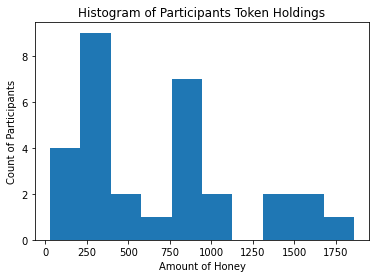

In [14]:
# Let's look at the distribution of participant holdings at the start of the sim
plt.hist([ network.nodes[i]['holdings'] for i in participants])
plt.title('Histogram of Participants Token Holdings')
plt.xlabel('Amount of Honey')
plt.ylabel('Count of Participants')


Text(0.5, 1.0, 'Participants Social Network')

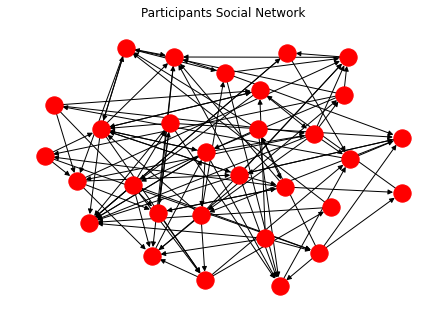

In [15]:
nx.draw_spring(network, nodelist = participants, edgelist=influencers)
plt.title('Participants Social Network')

In [16]:
#lets look at proposals
network.nodes[proposals[0]]

{'type': 'proposal',
 'conviction': 0,
 'status': 'candidate',
 'age': 0,
 'funds_requested': 964.7387009735636,
 'trigger': 17735090.882683326}

Proposals initially start without any conviction, and with the status of a candidate. If the proposal's amount of  conviction is greater than it's trigger, then the proposal moves to active and it's funds requested are granted. 

All initial proposal start with 0 conviction and state 'candidate'we can simply examine the amounts of funds requested

In [17]:
funds_array = np.array([ network.nodes[i]['funds_requested'] for i in proposals])
conviction_required = np.array([trigger_threshold(r, initial_funds, supply, alpha) for r in funds_array])

Text(0, 0.5, 'Amount of Honey requested(as a Fraction of Funds available)')

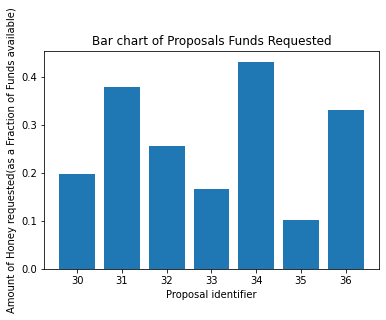

In [18]:
plt.bar( proposals, funds_array/initial_funds)
plt.title('Bar chart of Proposals Funds Requested')
plt.xlabel('Proposal identifier')
plt.ylabel('Amount of Honey requested(as a Fraction of Funds available)')

Text(0, 0.5, 'Amount of Conviction')

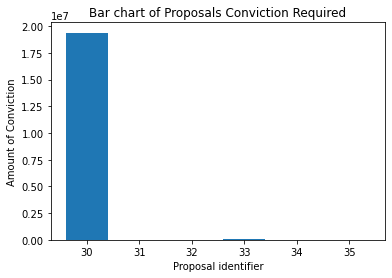

In [19]:
plt.bar( proposals, conviction_required)
plt.title('Bar chart of Proposals Conviction Required')
plt.xlabel('Proposal identifier')
plt.ylabel('Amount of Conviction')

Conviction is a concept that arises in the edges between participants and proposals in the initial conditions there are no votes yet so we can look at that later however, the voting choices are driven by underlying affinities which we can see now.

Text(0.5, 55.73999999999998, 'participant_id')

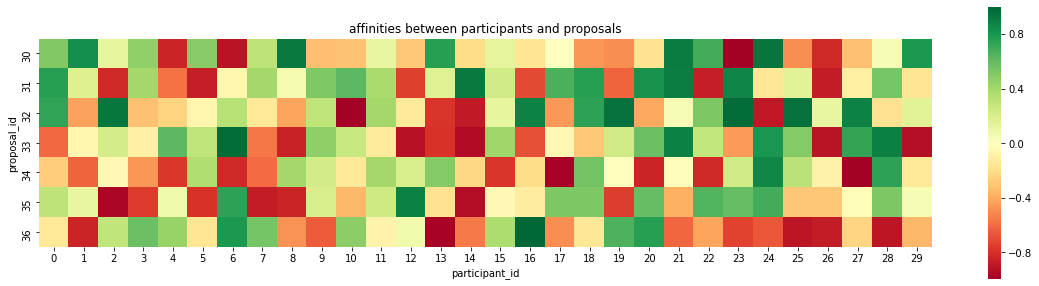

In [20]:
m = len(proposals)
n = len(participants)

affinities = np.empty((n,m))
for i_ind in range(n):
    for j_ind in range(m):
        i = participants[i_ind]
        j = proposals[j_ind]
        affinities[i_ind][j_ind] = network.edges[(i,j)]['affinity']

dims = (20, 5)
fig, ax = plt.subplots(figsize=dims)

sns.heatmap(affinities.T,
            xticklabels=participants,
            yticklabels=proposals,
            square=True,
            cbar=True,
            cmap = plt.cm.RdYlGn,
            ax=ax)

plt.title('affinities between participants and proposals')
plt.ylabel('proposal_id')
plt.xlabel('participant_id')

## Run simulation

Now we will create the final system configuration, append the genesis states we created, and run our simulation.

In [21]:
from cadCAD.configuration import append_configs

# Create configuration
append_configs(
    sim_configs=sim_config,
    initial_state=genesis_states,
    seeds=seeds,
    partial_state_update_blocks=partial_state_update_blocks
)

In [22]:
import numpy as np
import pandas as pd
from model.model.conviction_helper_functions import *
from model import run
from cadCAD import configs
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

rdf = run.run(configs)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (60, 1, 1, 4)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 71.09s


After the simulation has run successfully, we perform some postprocessing to extract node and edge values from the network object and add as columns to the pandas dataframe. For the rdf, we take only the values at the last substep of each timestep in the simulation.

In [23]:
df= run.postprocessing(rdf,0)

In [24]:
df.head(5)

,network,funds,sentiment,supply,simulation,run,substep,timestep,conviction,candidate_count,...,funds_requested,share_of_funds_requested,share_of_funds_requested_all,triggers,conviction_share_of_trigger,age,age_all,conviction_all,triggers_all,conviction_share_of_trigger_all
4,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4868.02,0.60,22392.22,0,1,4,1,[],0,...,"[964.7387009735636, 1848.1697852620496, 1253.0...",[],"[0.19817907212288294, 0.37965572729606656, 0.2...",[],[],[],"[1, 1, 1, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[20008819.522014346, inf, inf, 56451.973362751...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
8,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4870.89,0.60,22392.22,0,1,4,2,[],0,...,"[964.7387009735636, 1848.1697852620496, 1253.0...",[],"[0.19806214826264865, 0.3794317338505428, 0.25...",[],[],[],"[2, 2, 2, 2, 2, 2, 2, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[nan, nan, nan, nan, nan, nan, nan, 2120.69218...","[nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, ..."
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4870.99,0.60,22392.22,0,1,4,3,[],0,...,"[964.7387009735636, 1848.1697852620496, 1253.0...",[],"[0.19805814218066237, 0.3794240593168303, 0.25...",[],[],[],"[3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4872.08,0.60,22392.22,0,1,4,4,[],0,...,"[964.7387009735636, 1848.1697852620496, 1253.0...",[],"[0.19801376320743033, 0.37933904160442217, 0.2...",[],[],[],"[4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4872.73,0.60,22392.22,0,1,4,5,[],0,...,"[964.7387009735636, 1848.1697852620496, 1253.0...",[],"[0.19798740337405313, 0.3792885435290955, 0.25...",[],[],[],"[5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


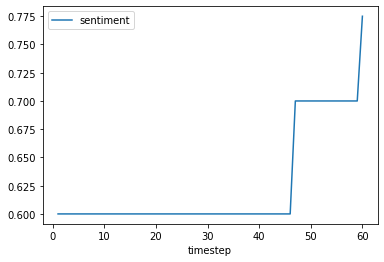

In [25]:
df.plot('timestep','sentiment')

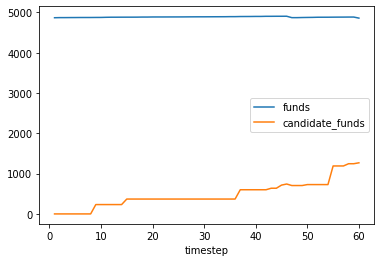

In [26]:
df.plot('timestep',['funds', 'candidate_funds'])

Funds are the total available funds, whereas candidate funds show how many funds are requested by candidate proposals.

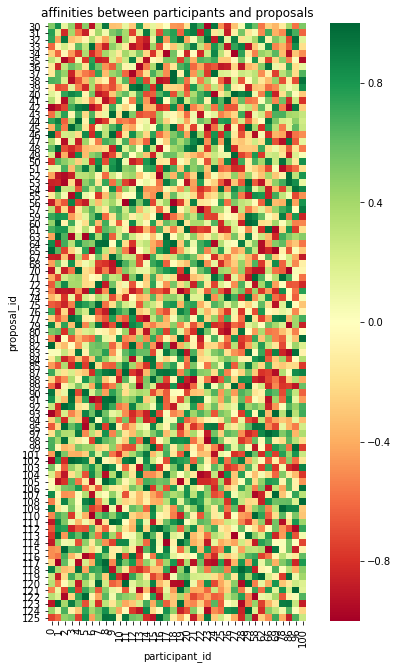

In [27]:
affinities_plot(df)

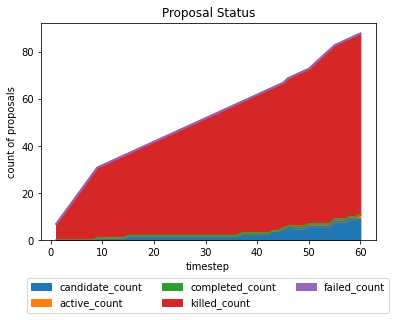

In [28]:
df.plot(x='timestep',y=['candidate_count','active_count','completed_count', 'killed_count', 'failed_count'],
         kind='area')
plt.title('Proposal Status')
plt.ylabel('count of proposals')
plt.legend(ncol = 3,loc='upper center', bbox_to_anchor=(0.5, -0.15))

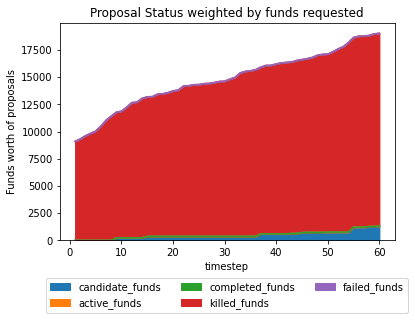

In [29]:
df.plot(x='timestep',y=['candidate_funds','active_funds','completed_funds', 'killed_funds', 'failed_funds'], kind='area')
plt.title('Proposal Status weighted by funds requested')
plt.ylabel('Funds worth of proposals')
plt.legend(ncol = 3,loc='upper center', bbox_to_anchor=(0.5, -0.15))

In [30]:
nets = df.network.values

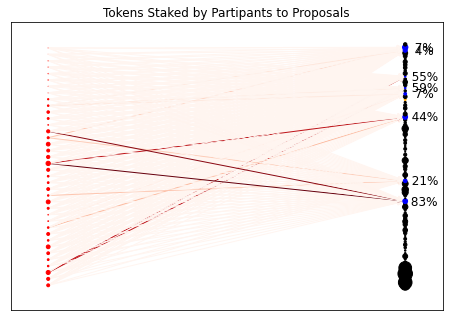

In [33]:
K = 55
N = 56
# K = 0
# N = 60

snap_plot(nets[K:N], size_scale = 1/10,savefigs=True)

In [34]:
# # Run the following code , without the #, in the images/snap folder to make a movie
# # ffmpeg -r 10 -i %01d.png -vcodec mpeg4 -y movie.mp4
# %%HTML
# <video width="400" height="400" controls>
#   <source src="images/snap/movie.mp4" type="video/mp4">
# </video>

## Conclusion

We have created a simplified conviction voting model that illustrates the state objects, and provides descriptions of how the model fits together. In subsequent notebooks, we will expand the model to introduce additional complexity to more fit real world implementations. 